<a href="https://colab.research.google.com/github/ovimasbul83/ovimasbul83/blob/main/animal_classifier_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"ovihaider","key":"4b1047900f51dd329793ea188b962d15"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pratik2901/animal-dataset

animal-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import tensorflow as tf
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,log={}):
    if (log.get('loss')<0.9):
      self.model.stop_training=True
      


In [ ]:
import zipfile
zip_path='/content/animal-dataset.zip'
zip_ref=zipfile.ZipFile(zip_path,'r')
zip_ref.extractall('animal-dataset')
zip_ref.close()

In [ ]:
import os
import matplotlib.pyplot as plt
elephant=os.listdir('/content/animal-dataset/animal_dataset_intermediate/train/elefante_train')
farfalla=os.listdir('/content/animal-dataset/animal_dataset_intermediate/train/farfalla_train')
print(len(elephant))
print(len(farfalla))

1302
1901


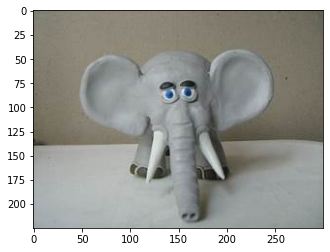

In [ ]:
import matplotlib.image as mpimg
img=mpimg.imread(os.path.join('/content/animal-dataset/animal_dataset_intermediate/train/elefante_train',elephant[60]))
#img2=mpimg.imread(os.path.join('/content/animal-dataset/animal_dataset_intermediate/train/farfalla_train',farfalla[0])
#plt.imshow(img)
plt.imshow(img)
plt.show()

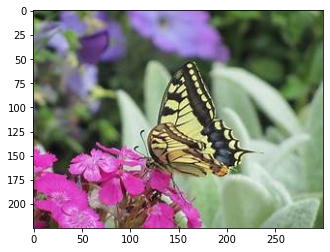

In [ ]:
img2=mpimg.imread(os.path.join('/content/animal-dataset/animal_dataset_intermediate/train/farfalla_train',farfalla[0]))
plt.imshow(img2)

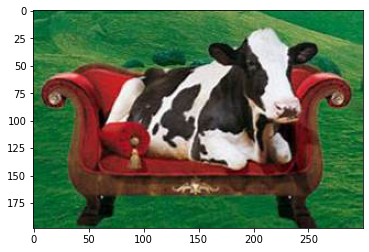

In [ ]:
mucca=os.listdir('/content/animal-dataset/animal_dataset_intermediate/train/mucca_train')
img3=mpimg.imread(os.path.join('/content/animal-dataset/animal_dataset_intermediate/train/mucca_train',mucca[0]))
plt.imshow(img3)

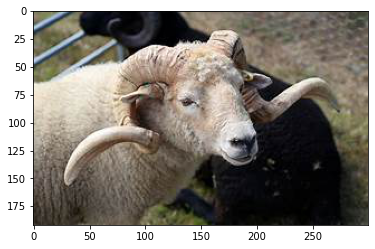

In [ ]:
pecora=os.listdir('/content/animal-dataset/animal_dataset_intermediate/train/pecora_train')
img4=mpimg.imread(os.path.join('/content/animal-dataset/animal_dataset_intermediate/train/pecora_train',pecora[0]))
plt.imshow(img4)

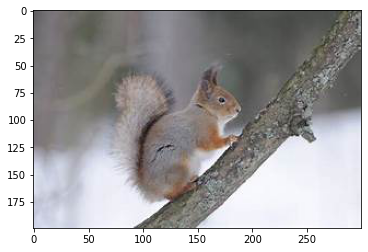

In [ ]:
sociattolo=os.listdir('/content/animal-dataset/animal_dataset_intermediate/train/scoiattolo_train')
img5=mpimg.imread(os.path.join('/content/animal-dataset/animal_dataset_intermediate/train/scoiattolo_train',sociattolo[0]))
plt.imshow(img5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
traindatagen=ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
testdatagen=ImageDataGenerator(rescale=1./255)
traindir='/content/animal-dataset/animal_dataset_intermediate/train'
testdir='/content/animal-dataset/animal_dataset_intermediate/test'
traindata=traindatagen.flow_from_directory(traindir,target_size=(250,250),class_mode='categorical',shuffle=True)
testdata=testdatagen.flow_from_directory(testdir,target_size=(250,250),class_mode='categorical',shuffle=True)

Found 8196 images belonging to 5 classes.
Found 0 images belonging to 0 classes.


In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(200,(3,3),activation='relu',input_shape=(250,250,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(180,(3,3),activation='relu'),
                                  tf.keras.layers.Conv2D(150,(3,3),activation='relu'),
                                  tf.keras.layers.Conv2D(120,(3,3),activation='relu'),
                                  tf.keras.layers.Conv2D(100,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(180,activation='relu'),
                                  tf.keras.layers.Dense(100,activation='relu'),
                                  tf.keras.layers.Dense(50,activation='relu'),
                                  tf.keras.layers.Dense(5,activation='softmax')


                                  ])
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(traindata,epochs=50,validation_data=testdata)

Epoch 1/50
257/257 [==============================] - 169s 659ms/step - loss: 1.3077 - accuracy: 0.4416
Epoch 2/50
257/257 [==============================] - 167s 652ms/step - loss: 1.0679 - accuracy: 0.5691
Epoch 3/50
210/257 [=======================>......] - ETA: 30s - loss: 0.9715 - accuracy: 0.6179